In [1]:
import sys
!{sys.executable} -m pip install tensorflow

You should consider upgrading via the 'C:\Users\jenni\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
import tensorflow as tf
from tensorflow import keras
tf.__version__



'2.8.0'

In [3]:
keras.__version__

'2.8.0'

In [4]:
"""
70,000 grayscale images of 28 × 28 pixels each, with 10 classes
 the pixel intensities are represented as integers (from 0 to 255) 
 rather than floats (from 0.0 to 255.0)
 
 
"""
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
X_train_full.shape

(60000, 28, 28)

X_train_full.dtype

Note that the dataset is already split into a training set and a test set, but there is no validation set, so we’ll create one now. Additionally, since we are going to train the neural network using Gradient Descent, we must scale the input features. For simplicity, we’ll scale the pixel intensities down to the 0–1 range by dividing them by 255.0 (this also converts them to floats):

In [6]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

For Fashion MNIST, however, we need the list of class names to know what we are dealing with:

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

the first image in the training set represents a coat

In [8]:
class_names[y_train[0]]

'Coat'

## Creating the model using the Sequential API

classification MLP with two hidden layers:

In [9]:
"""
The first line creates a Sequential model. 
This is the simplest kind of Keras model for neural networks 
that are just composed of a single stack of layers connected sequentially. 
This is called the Sequential API.
"""
model = keras.models.Sequential()
"""
Next, we build the first layer and add it to the model. 
It is a Flatten layer whose role is to convert each input image 
into a 1D array: if it receives input data X, 
it computes X.reshape(-1, 28*28). 
This layer does not have any parameters; 
it is just there to do some simple preprocessing. 
Since it is the first layer in the model, 
you should specify the input_shape, which doesn’t 
include the batch size, only the shape of the instances. 
Alternatively, you could add a keras.layers.InputLayer as the 
first layer, setting input_shape=[28,28].
"""
model.add(keras.layers.Flatten(input_shape=[28, 28]))
"""
Next we add a Dense hidden layer with 300 neurons. 
It will use the ReLU activation function. 
Each Dense layer manages its own weight matrix, 
containing all the connection weights between the neurons 
and their inputs. It also manages a vector of bias terms 
(one per neuron). When it receives some input data, 
it computes RELU
"""
model.add(keras.layers.Dense(300, activation="relu"))
"""
Then we add a second Dense hidden layer with 100 neurons, also using the ReLU activation function.
"""
model.add(keras.layers.Dense(100, activation="relu"))
"""
Finally, we add a Dense output layer with 10 neurons (one per class)
, using the softmax activation function 
(because the classes are exclusive).
"""
model.add(keras.layers.Dense(10, activation="softmax"))

The model’s summary() method displays all the model’s layers, including each layer’s name

Note that Dense layers often have a lot of parameters

the first hidden layer has 784 × 300 connection weights, plus 300 bias terms, which adds up to 235,500 parameters

This gives the model quite a lot of flexibility to fit the training data, but it also means that the model runs the risk of overfitting, especially when you do not have a lot of training data

In [10]:
 model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


You can easily get a model’s list of layers, to fetch a layer by its index, or you can fetch it by name:

In [11]:
model.layers

In [12]:
hidden1 = model.layers[1]
hidden1.name

'dense'

All the parameters of a layer can be accessed using its get_weights() and set_weights() methods

In [13]:
weights, biases = hidden1.get_weights()
print(weights)
print(weights.shape)

[[-0.00887785  0.05400233  0.06962745 ... -0.01838848  0.04364935
   0.01074974]
 [ 0.0490852   0.03905017  0.0005837  ... -0.02561912 -0.02006195
  -0.01353051]
 [-0.04104273  0.01686881  0.02650098 ...  0.02499767 -0.02749161
  -0.00835118]
 ...
 [-0.06547298  0.00585216  0.02453049 ...  0.00947952 -0.0041702
   0.02563044]
 [-0.02239789  0.02427118 -0.00137298 ... -0.06020465 -0.01762351
   0.01387607]
 [ 0.06561349 -0.06352678  0.07412522 ... -0.01485437 -0.0283226
  -0.01921543]]
(784, 300)


In [14]:
print(biases)
print(biases.shape)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(300,)


Notice that the Dense layer initialized the connection weights randomly (which is needed to break symmetry

and the biases were initialized to zeros, which is fine. If you ever want to use a different initialization method, you can set kernel_initializer (kernel is another name for the matrix of connection weights) or bias_initializer when creating the layer.

The shape of the weight matrix depends on the number of inputs. 

This is why it is recommended to specify the input_shape when creating the first layer in a Sequential model. 

However, if you do not specify the input shape, it’s OK: Keras will simply wait until it knows the input shape before it actually builds the model. 

This will happen either when you feed it actual data (e.g., during training), or when you call its build() method. 

Until the model is really built, the layers will not have any weights, and you will not be able to do certain things (such as print the model summary or save the model). 

So, if you know the input shape when creating the model, it is best to specify it.

## Compiling the model

After a model is created, you must call its compile() method to 
specify the loss function and the optimizer to use. 
Optionally, you can specify a list of extra metrics to compute 
during training and evaluation


In [15]:
 
"""
First, we use the "sparse_categorical_crossentropy" loss because 
we have sparse labels (i.e., for each instance, there is just a 
target class index, from 0 to 9 in this case), 
and the classes are exclusive. 
If instead we had one target probability per class for 
each instance (such as one-hot vectors, 
e.g. [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.] to represent class 3), 
then we would need to use the "categorical_crossentropy" loss instead. 
If we were doing binary classification or multilabel binary 
classification, then we would use the "sigmoid" (i.e., logistic) activation 
function in the output layer instead of the "softmax" activation 
function, and we would use the "binary_crossentropy" loss.
"""
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])


If you want to convert sparse labels (i.e., class indices) to one-hot vector labels, use the keras.utils.to_categorical() function. To go the other way round, use the np.argmax() function with axis=1.

Regarding the optimizer, "sgd" means that we will train the model using simple Stochastic Gradient Descent. In other words, Keras will perform the backpropagation algorithm described earlier (i.e., reverse-mode autodiff plus Gradient Descent). 

When using the SGD optimizer, it is important to tune the learning rate. So, you will generally want to use optimizer=keras.optimizers.SGD(lr=???) to set the learning rate, rather than optimizer="sgd", which defaults to lr=0.01

In [16]:
history = model.fit(X_train, y_train, epochs=30,
                     validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7149 - accuracy: 0.7652 - val_loss: 0.5277 - val_accuracy: 0.8242
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4892 - accuracy: 0.8295 - val_loss: 0.4410 - val_accuracy: 0.8524
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4442 - accuracy: 0.8459 - val_loss: 0.4168 - val_accuracy: 0.8544
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4168 - accuracy: 0.8529 - val_loss: 0.4030 - val_accuracy: 0.8576
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3963 - accuracy: 0.8617 - val_loss: 0.3920 - val_accuracy: 0.8596
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3796 - accuracy: 0.8673 - val_loss: 0.3706 - val_accuracy: 0.8730
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3674 - accuracy: 0.8708 - val_loss: 0.3675 - val_accuracy:

We pass it the input features (X_train) and the target classes (y_train), as well as the number of epochs to train (or else it would default to just 1, which would definitely not be enough to converge to a good solution). 

We also pass a validation set (this is optional). 

Keras will measure the loss and the extra metrics on this set at the end of each epoch, which is very useful to see how well the model really performs. 

If the performance on the training set is much better than on the validation set, your model is probably overfitting the training set 

And that’s it! The neural network is trained. 

At each epoch during training, Keras displays the number of instances processed so far (along with a progress bar), 

the mean training time per sample, and the loss and accuracy (or any other extra metrics you asked for) on both the training set and the validation set. 

You can see that the training loss went down, which is a good sign, and the validation accuracy reached 89.26% after 30 epochs. 

That’s not too far from the training accuracy, so there does not seem to be much overfitting going on.

Instead of passing a validation set using the validation_data argument, you could set validation_split to the ratio of the training set that you want Keras to use for validation. For example, validation_split=0.1 tells Keras to use the last 10% of the data (before shuffling) for validation.

If the training set was very skewed, with some classes being overrepresented and others underrepresented, 

it would be useful to set the class_weight argument when calling the fit() method, which would give a larger weight to underrepresented classes and a lower weight to overrepresented classes. 

These weights would be used by Keras when computing the loss. 

If you need per-instance weights, set the sample_weight argument (if both class_weight and sample_weight are provided, Keras multiplies them). 

Per-instance weights could be useful if some instances were labeled by experts while others were labeled using a crowdsourcing platform: you might want to give more weight to the former. 

You can also provide sample weights (but not class weights) for the validation set by adding them as a third item in the validation_data tuple.

The fit() method returns a History object containing the training parameters (history.params), the list of epochs it went through (history.epoch), and most importantly a dictionary (history.history) containing the loss and extra metrics it measured at the end of each epoch on the training set and on the validation set (if any). If you use this dictionary to create a pandas DataFrame and call its plot() method, you get the learning curves

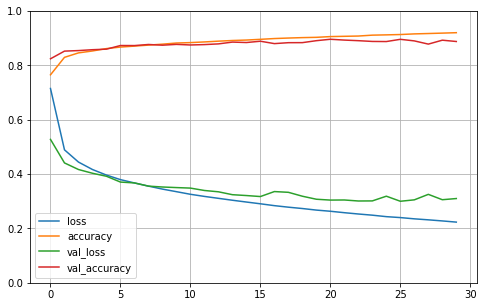

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Learning curves: the mean training loss and accuracy measured over each epoch, and the mean validation loss and accuracy measured at the end of each epoch

You can see that both the training accuracy and the validation accuracy steadily increase during training, while the training loss and the validation loss decrease. Good! 

Moreover, the validation curves are close to the training curves, which means that there is not too much overfitting. 

In this particular case, the model looks like it performed better on the validation set than on the training set at the beginning of training. 

But that’s not the case: indeed, the validation error is computed at the end of each epoch, while the training error is computed using a running mean during each epoch. 

So the training curve should be shifted by half an epoch to the left. If you do that, you will see that the training and validation curves overlap almost perfectly at the beginning of training.

 You can tell that the model has not quite converged yet, as the validation loss is still going down, so you should probably continue training. It’s as simple as calling the fit() method again, since Keras just continues training where it left off (you should be able to reach close to 89.4% validation accuracy).

In [18]:
# history = model.fit(X_train, y_train, epochs=30,
#                      validation_data=(X_valid, y_valid))

In [19]:
# pd.DataFrame(history.history).plot(figsize=(8, 5))
# plt.grid(True)
# plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
# plt.show()

If you are not satisfied with the performance of your model, you should go back and tune the hyperparameters. The first one to check is the learning rate. If that doesn’t help, try another optimizer (and always retune the learning rate after changing any hyperparameter)

If the performance is still not great, then try tuning model hyperparameters such as the number of layers, the number of neurons per layer, and the types of activation functions to use for each hidden layer

You can also try tuning other hyperparameters, such as the batch size (it can be set in the fit() method using the batch_size argument



Once you are satisfied with your model’s validation accuracy, you should evaluate it on the test set to estimate the generalization error before you deploy the model to production. You can easily do this using the evaluate() method (it also supports several other arguments, such as batch_size and sample_weight;

## eval on test set

In [20]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3391 - accuracy: 0.8788


[0.3391195237636566, 0.8787999749183655]

 it is common to get slightly lower performance on the test set than on the validation set, because the hyperparameters are tuned on the validation set, not the test set  (however, in this example, we did not do any hyperparameter tuning, so the lower accuracy is just bad luck). 
 
 Remember to resist the temptation to tweak the hyperparameters on the test set, or else your estimate of the generalization error will be too optimistic.

## Using the model to make predictions

Next, we can use the model’s predict() method to make predictions on new instances. Since we don’t have actual new instances, we will just use the first three instances of the test set:

In [21]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

As you can see, for each instance the model estimates one probability per class, from class 0 to class 9.



In [27]:
y_pred = (model.predict(X_new) > 0.5).astype("int32")
y_pred

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]])

In [32]:
import numpy as np
# np.array(class_names)[y_pred]

In [29]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

In [31]:
np.array(class_names)[y_new]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

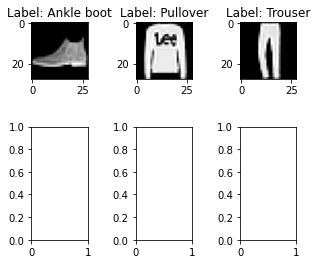

In [50]:
# specify the number of rows and columns you want to see
num_row = 2
num_col = 3

# get a segment of the dataset
num = num_row*num_col
images = X_new
labels = np.array(class_names)[y_new]

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(3):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()